# Script for Plotting
    plots and last analysis for the writing document

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
## load data
google_data = pd.read_pickle('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Google Patents/Data/ai_total_.pkl')
us_patents = pd.read_csv('/Users/trinidadbosch/Desktop/SEDS/MA-Thesis/thesis-env/Google Patents/Scripts/us_patents.csv')

In [3]:
google_data.columns
#us_patents.columns

Index(['publication_number', 'family_id', 'title_localized',
       'abstract_localized', 'publication_date', 'country_code', 'filing_date',
       'grant_date'],
      dtype='object')

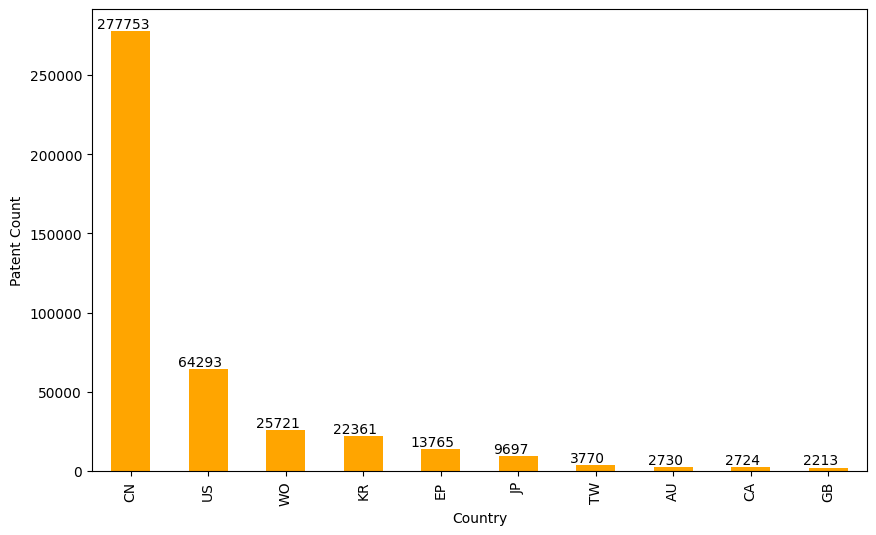

In [4]:
# Counting occurrences of each country code
country_code_counts = google_data['country_code'].value_counts()

# Selecting the top 10 country codes
top_10_country_codes = country_code_counts.head(10)

# Plotting the bar chart for the top 10 country codes
plt.figure(figsize=(10, 6))
bars = top_10_country_codes.plot(kind='bar', color='orange')
#plt.title('Top 10 Country Code Distribution')
plt.xlabel('Country')
plt.ylabel('Patent Count')

# Adding values on top of the bars
for bar, count in zip(bars.patches, top_10_country_codes.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

# Save the plot as SVG
#plt.savefig('top_10_country_codes.svg', format='svg')

plt.show()

In [5]:
google_data['publication_date'] = pd.to_datetime(google_data['publication_date'],format='%Y%m%d')
google_data['publication_year'] = google_data['publication_date'].dt.year

In [6]:

us_patents['publication_date'] = pd.to_datetime(us_patents['publication_date'],format='%Y%m%d')
us_patents['publication_year'] = us_patents['publication_date'].dt.year

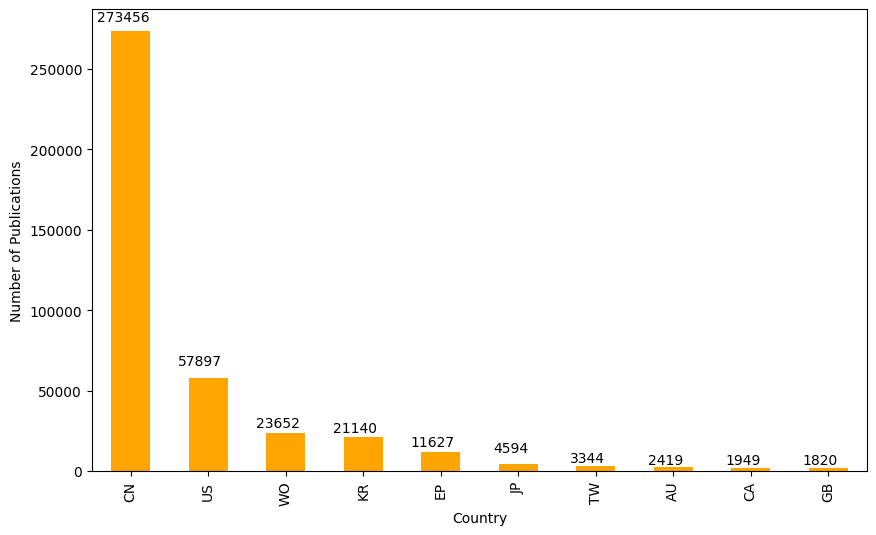

In [7]:
# Assuming google_data is your DataFrame and it's already prepared
# Step 1: Filter for the last 10 years
current_year = pd.to_datetime('now').year
filtered_data = google_data[google_data['publication_year'] >= (current_year - 10)]

# Step 2: Count occurrences of each country_code
country_counts = filtered_data['country_code'].value_counts()

# Step 3: Plot the bar chart for only the top 10 countries
top_10_countries = country_counts.head(10)  # Only select the top 10

# Step 3: Plot the bar chart
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size as needed
top_10_countries.plot(kind='bar', color = 'orange')
#plt.title('Patent Publications by Country in the Last 10 Years')
plt.xlabel('Country')
plt.ylabel('Number of Publications')

# Adding values on top of the bars
for bar, count in zip(bars.patches, top_10_countries.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), ha='center', va='bottom')

plt.xticks(rotation=90)  # Rotate country codes for better readability
# Save the plot as SVG
#plt.savefig('top_10_country_codes.svg', format='svg')

plt.show()

In [9]:
country_counts.head(10)

country_code
CN    273456
US     57897
WO     23652
KR     21140
EP     11627
JP      4594
TW      3344
AU      2419
CA      1949
GB      1820
Name: count, dtype: int64

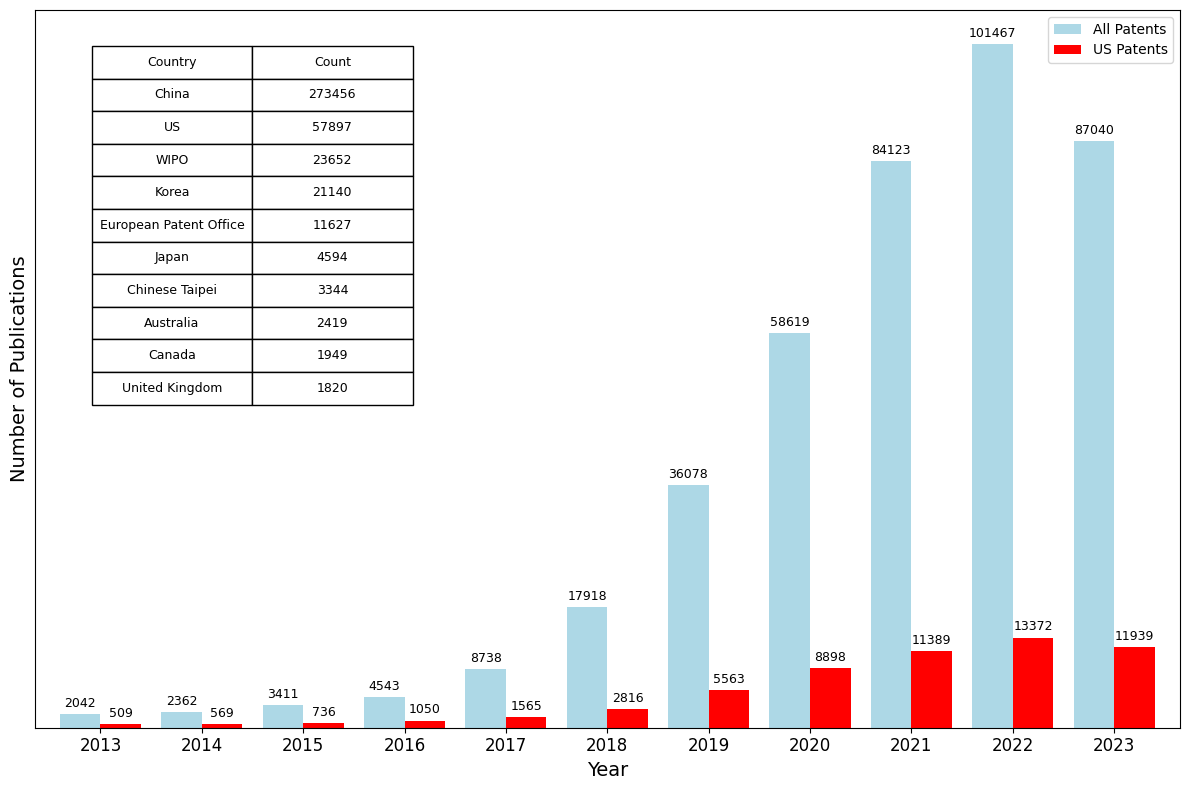

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming google_data_last_10_years and us_patents_last_10_years are already defined
# Filter the data for the last 10 years as before
current_year = pd.to_datetime('now').year
start_year = current_year - 11

google_data_last_10_years = google_data[google_data['publication_year'] >= start_year]
us_patents_last_10_years = us_patents[us_patents['publication_year'] >= start_year]

# Calculate yearly counts for both datasets
google_yearly_counts = google_data_last_10_years['publication_year'].value_counts().sort_index()
us_yearly_counts = us_patents_last_10_years['publication_year'].value_counts().sort_index()

# Merge these counts into a single DataFrame
yearly_counts_df = pd.DataFrame({
    'All Patents': google_yearly_counts,
    'US Patents': us_yearly_counts
}).fillna(0)  # Fill missing values with 0
# Prepare the DataFrame with the given data for country counts
country_counts_data = {
    'Country': ['China', 'US', 'WIPO', 'Korea', 'European Patent Office', 'Japan', 'Chinese Taipei', 'Australia', 'Canada', 'United Kingdom'],
    'Count': [273456, 57897, 23652, 21140, 11627, 4594, 3344, 2419, 1949, 1820]
}
country_counts_df = pd.DataFrame(country_counts_data)

# Prepare the plot with adjusted sizes
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting the bar charts
colors = {'All Patents': 'lightblue', 'US Patents': 'red'}
yearly_counts_df.plot(kind='bar', width=0.8, color=[colors[n] for n in yearly_counts_df.columns], ax=ax)
ax.set_xlabel('Year', fontsize=14)  # Increase font size for x-axis label
ax.set_ylabel('Number of Publications', fontsize=14)  # Increase font size for y-axis label
#ax.set_title('Yearly Publications: All Patents vs. US Patents', fontsize=16)  # Optionally increase title font size
plt.xticks(rotation=360)
ax.set_yticks([])
ax.tick_params(axis='both', which='major', labelsize=12)  # Increase font size for axis ticks
ax.legend(loc='upper right')
 # Optionally increase legend font size

# Adding counts above bars for clarity
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)

# Creating an inset table inside the plot for country counts
table = plt.table(cellText=country_counts_df.values, colLabels=country_counts_df.columns, cellLoc='center', loc='upper left', bbox=[0.05, 0.45, 0.28, 0.5])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1)

plt.tight_layout()
plt.savefig('all-us-patents.svg', format='svg')
plt.show()


In [25]:
us_patents

,Unnamed: 0,publication_number,family_id,publication_date,country_code,filing_date,grant_date,title,abstract,title_lemma,abstract_lemma
0,0,US-11403485-B2,80741606,20220802,US,20200921,20220802,Use of a saliency map to train a colorization ANN,Methods and systems for training and utilizing...,"['use', 'of', 'a', 'saliency', 'map', 'to', 't...","['method', 'and', 'system', 'for', 'training',..."
1,1,US-11322073-B2,69884999,20220503,US,20180921,20220503,Method and apparatus for dynamically optimizin...,An information handling system operating a lea...,"['method', 'and', 'apparatus', 'for', 'dynamic...","['an', 'information', 'handle', 'system', 'ope..."
2,2,US-11481882-B2,75909571,20221025,US,20201118,20221025,Systems and methods for selective replacement ...,Exemplary embodiments are directed to a system...,"['system', 'and', 'method', 'for', 'selective'...","['exemplary', 'embodiment', 'be', 'direct', 't..."
3,3,US-11170292-B2,65720469,20211109,US,20180921,20211109,Static random-access memory for deep neural ne...,A static random-access memory (SRAM) system in...,"['static', 'random', 'access', 'memory', 'for'...","['a', 'static', 'random', 'access', 'memory', ..."
4,4,US-11521712-B2,64274900,20221206,US,20180518,20221206,Computational method for classifying and predi...,A computer-implemented method for predicting a...,"['computational', 'method', 'for', 'classify',...","['a', 'computer', 'implement', 'method', 'for'..."
...,...,...,...,...,...,...,...,...,...,...,...
64288,426471,US-2020327377-A1,72514543,20201015,US,20200320,0,Artificial Intelligence-Based Quality Scoring,The technology disclosed assigns quality score...,"['artificial', 'intelligence', 'based', 'quali...","['the', 'technology', 'disclose', 'assign', 'q..."
64289,426473,US-2021012288-A1,74102318,20210114,US,20200713,0,Method and system for guidance of artificial i...,A method for generating an optimal set of para...,"['method', 'and', 'system', 'for', 'guidance',...","['a', 'method', 'for', 'generate', 'an', 'opti..."
64290,426494,US-9916380-B2,59226512,20180313,US,20160520,20180313,Readability awareness in natural language proc...,Electronic natural language processing in a na...,"['readability', 'awareness', 'in', 'natural', ...","['electronic', 'natural', 'language', 'process..."
64291,427009,US-9881208-B2,60659570,20180130,US,20160620,20180130,Neural network based recognition of mathematic...,Provided are methods and system for recognizin...,"['neural', 'network', 'base', 'recognition', '...","['provide', 'be', 'method', 'and', 'system', '..."
